# 🚗 Vehicle Sales Analytics – Análise Estatística de Vendas de Veículos

Este notebook faz parte de um trabalho de Estatística e apresenta a análise do dataset **Vehicle Sales and Market Trends**, que reúne informações sobre vendas de veículos, incluindo características dos automóveis, condições de uso, preços de venda, valores de mercado (MMR) e dados das transações.  

O objetivo é aplicar técnicas de **análise exploratória de dados (EDA)**, **testes de hipóteses** e **modelagem de regressão linear**, a fim de identificar padrões, tendências e gerar insights úteis para a tomada de decisão no contexto do mercado automotivo.  

### 1. Exploração e Tratamento dos Dados para Análise

#### 1.1 Visualização inicial dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('data/car_prices.csv')

In [3]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
print("dimensões do dataset (linhas, colunas):")
print(df.shape)

dimensões do dataset (linhas, colunas):
(558837, 16)


In [6]:
print("tipos de dados por coluna:")
df.dtypes

tipos de dados por coluna:


year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

#### 1.2 Tratando o tipo da coluna saledate 

In [7]:
saledate_clean = pd.to_datetime(df["saledate"], errors="coerce", utc=True)

df["saledate"] = saledate_clean.dt.tz_convert(None)


/tmp/ipykernel_102686/256252827.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  saledate_clean = pd.to_datetime(df["saledate"], errors="coerce", utc=True)


In [ ]:
data_limite = pd.to_datetime("2014-11-01")

df = df[df["saledate"] >= data_limite]



In [9]:
df["saledate"].head(5)

0   2014-12-16 04:30:00
1   2014-12-16 04:30:00
2   2015-01-14 20:30:00
3   2015-01-28 20:30:00
4   2014-12-18 04:30:00
Name: saledate, dtype: datetime64[ns]

#### 1.3 Buscando valores ausentes ou duplicados

In [10]:
print(f"Linhas duplicadas: {df.duplicated().sum()}")

Linhas duplicadas: 0


In [11]:
print(f"Valores nulos por coluna:\n{df.isnull().sum()}")

Valores nulos por coluna:
year                0
make            10301
model           10399
trim            10651
body            13191
transmission    65337
vin                 0
state               0
condition       11794
odometer           93
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


#### 1.4 Lidando com valores ausentes

In [12]:
df = df.dropna(subset=["sellingprice", "saledate", "odometer", "condition"])
print(df.shape)

(546770, 16)


In [13]:
categorical_cols = ["make", "model", "trim", "body", 
                    "transmission","color", "interior"]

df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [14]:
print(f"Valores nulos por coluna:\n{df.isnull().sum()}")

Valores nulos por coluna:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


#### 1.5 estatísticas descritivas das colunas quantitativas

In [15]:
df.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,546770.000000,546770.000000,546770.000000,546770.000000,546770.000000,546770
mean,2010.133734,30.672308,67270.600596,13915.055645,13763.735735,2015-03-07 20:13:27.641348608
min,1982.000000,1.000000,1.000000,25.000000,1.000000,2014-12-16 04:00:00
25%,2008.000000,23.000000,28057.000000,7375.000000,7100.000000,2015-01-21 17:35:00
50%,2012.000000,35.000000,51233.500000,12400.000000,12300.000000,2015-02-16 17:30:00
75%,2013.000000,42.000000,97400.000000,18450.000000,18300.000000,2015-05-21 19:20:00
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015-07-20 19:30:00
std,3.906319,13.401544,52793.422255,9675.055714,9748.359915,NaN


#### 1.6 Distribuição das variáveis categóricas

In [16]:
df["make"].value_counts()

make
Ford          91986
Chevrolet     58853
Nissan        53124
Toyota        38993
Dodge         30106
              ...  
dodge tk          1
airstream         1
dot               1
mercedes-b        1
Lotus             1
Name: count, Length: 94, dtype: int64

In [17]:
df["model"].value_counts()

model
Altima      19167
F-150       14170
Fusion      12868
Camry       12327
Escape      11713
            ...  
Ram Van         1
uplandr         1
mountnr         1
B-Series        1
ML55 AMG        1
Name: count, Length: 960, dtype: int64

In [18]:
df["body"].value_counts()

body
Sedan          194866
SUV            116035
sedan           41902
suv             24551
Hatchback       20899
                ...  
CTS-V Wagon         1
Ram Van             1
g37 coupe           1
cab plus 4          1
cts wagon           1
Name: count, Length: 87, dtype: int64

#### 1.7 Tratando as variáveis categóricas

In [19]:
# Lista de colunas categóricas com tipos duplicados 
cat_cols = ["make", "model","body"]

# Padronizar para minúsculas
for col in cat_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

### 2.0 Análise gráfica exploratória das amostra

#### 2.1 Vendas ao longo do tempo

/home/liborio/miniconda3/envs/movies/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


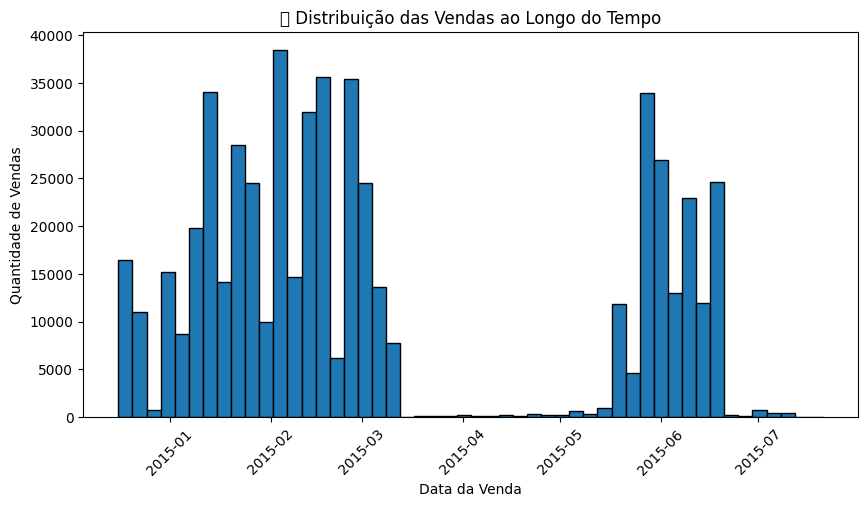

In [20]:
plt.figure(figsize=(10,5))
plt.hist(df["saledate"], bins=50, edgecolor="black")
plt.xlabel("Data da Venda")
plt.ylabel("Quantidade de Vendas")
plt.title("📊 Distribuição das Vendas ao Longo do Tempo")
plt.xticks(rotation=45)
plt.show()


#### 2.2 Histograma dos preços das vendas

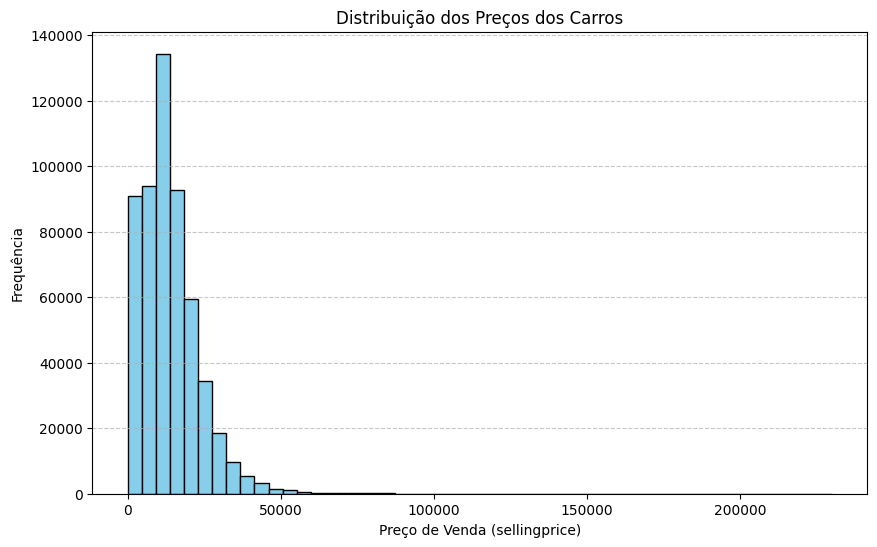

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df["sellingprice"], bins=50, edgecolor="black", color="skyblue")
plt.xlabel("Preço de Venda (sellingprice)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Preços dos Carros")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### 2.3 Restante da visualização grafica mais precisa do dashboard interativo

  ### 3.0 Análise de Regressão Linear e Testes de Hipóteses

### 3.1 Hipóteses formuladas da visualização grafica.
Com base na análise exploratória e nas visualizações gráficas do conjunto de dados de 2015, algumas hipóteses iniciais puderam ser levantadas:

- **H₁:** Carros mais novos (ano de fabricação maior) tendem a ter preços de venda mais altos.  

- **H₂:** Veículos com maior quilometragem (`odometer`) apresentam preços médios menores.  

- **H₃:** A condição do carro (`condition`) influencia positivamente o valor de venda, isto é, carros em melhor estado são vendidos por preços mais altos.  

- **H₄** A idade do carro (tempo em anos desde a fabricação), em conjunto com a quilometragem percorrida, tem impacto negativo sobre sua qualidade percebida e, consequentemente, sobre o preço de venda — carros mais antigos e muito rodados tendem a ser vendidos por valores mais baixos.

Essas hipóteses foram posteriormente avaliadas de forma estatística por meio da regressão linear (seção 3.1), permitindo verificar a significância de cada variável na explicação do preço de venda.

3.2 – Análise dos Preços de Carros vendidos em 2015

Nesta subseção, foi desenvolvido um modelo de **regressão linear Múltipla** com o objetivo de analisar os fatores que influenciam o preço de venda (`sellingprice`) de carros usados durante o ano de **2015**. Para isso, foram consideradas três variáveis explicativas:

- **`year`**: ano de fabricação do veículo;  
- **`odometer`**: quilometragem percorrida;  
- **`condition`**: condição do carro em escala numérica.  


In [22]:
# 🎯 Variável dependente (alvo)
y = df["sellingprice"]

# 📊 Variáveis independentes 
X = df[["year", "odometer", "condition"]]

# 🔀 Divisão treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ➕ Adicionar intercepto
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 📈 Ajustar modelo de regressão linear (OLS)
model = sm.OLS(y_train, X_train_const).fit()

# 📊 Resumo estatístico
print("Coeficientes:", model.params, "\n")
print("Erro Padrão:", model.bse, "\n")
print("p-valores:", model.pvalues, "\n")
print("Intervalos de confiança:", model.conf_int())

Coeficientes: const       -1.514203e+06
year         7.606578e+02
odometer    -5.593892e-02
condition    8.830535e+01
dtype: float64 

Erro Padrão: const        10083.094745
year             5.009354
odometer         0.000366
condition        0.982655
dtype: float64 

p-valores: const        0.0
year         0.0
odometer     0.0
condition    0.0
dtype: float64 

Intervalos de confiança:                       0             1
const     -1.533966e+06 -1.494441e+06
year       7.508396e+02  7.704760e+02
odometer  -5.665697e-02 -5.522088e-02
condition  8.637938e+01  9.023133e+01


- **Coeficientes:** mostram o impacto de cada variável sobre o preço.  
- **Erro Padrão:** mede a incerteza associada à estimativa do coeficiente; quanto menor, mais confiável é a estimativa.  
- **p-valores:** como todos foram menores que 0,05, rejeitamos a hipótese nula e concluímos que todas as variáveis são **estatisticamente significativas** para explicar o preço de venda.  
- **Intervalos de Confiança (95%):** confirmam a robustez das estimativas, já que não incluem o valor zero e mantêm o mesmo sinal (positivo ou negativo).  

### 📌 Interpretação Prática

A partir dos coeficientes estimados pelo modelo, temos os seguintes insights sobre os preços de venda em 2015:

- **Ano de fabricação (`year`)**: cada ano a mais aumenta o preço de venda em cerca de **US$ 760**.  
- **Quilometragem (`odometer`)**: cada quilômetro rodado reduz o preço em aproximadamente **US$ 0,056**.  
  - Na prática, a cada **10.000 km rodados**, o veículo perde cerca de **US$ 560** em valor de mercado.  
- **Condição (`condition`)**: cada ponto a mais na escala de condição aumenta o preço em média **US$ 88**.  

Esses resultados confirmam e mostram o quanto **carros mais novos, menos rodados e em melhor estado de conservação tendem a alcançar preços mais altos** no mercado de usados.

#### 3.2 Regressão Linear – Análise de correlação da variável condition.


In [ ]:
# 🎯 Variável dependente (alvo)
y2 = df["condition"]

# 📊 Variáveis independentes 
X2 = df[["year", "odometer"]]

# 🔀 Divisão treino (70%) e teste (30%)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)

# ➕ Adicionar intercepto
X2_train_const = sm.add_constant(X2_train)
X2_test_const = sm.add_constant(X2_test)

# 📈 Ajustar modelo de regressão linear (OLS) - Ordinary Least Squares (Mínimos Quadrados Ordinários).
model2 = sm.OLS(y2_train, X2_train_const).fit()

# 📊 Resumo estatístico
print("Coeficientes:", model2.params, "\n")
print("Erro Padrão:", model2.bse, "\n")
print("p-valores:", model2.pvalues, "\n")
print("Intervalos de confiança:", model2.conf_int())



Coeficientes: const      -1583.869808
year           0.804356
odometer      -0.000035
dtype: float64 

Erro Padrão: const       1.638727e+01
year        8.136851e-03
odometer    6.000222e-07
dtype: float64 

p-valores: const       0.0
year        0.0
odometer    0.0
dtype: float64 

Intervalos de confiança:                     0            1
const    -1615.988376 -1551.751240
year         0.788408     0.820304
odometer    -0.000036    -0.000033


)

- **Coeficientes:**  
  - `year`: **+0,804** → carros mais novos tendem a ter condição melhor.  
  - `odometer`: **-0,000035** → mais quilômetros rodados reduzem a condição.  
- **Erro Padrão:** todos muito baixos, mostrando que as estimativas são precisas.  
- **p-valores:** todos iguais a **0.0**, rejeitando H₀. As variáveis são estatisticamente significativas.  
- **Intervalos de Confiança (95%):**  
  - `year`: [0,788 ; 0,820] → efeito sempre positivo.  
  - `odometer`: [-0,000036 ; -0,000033] → efeito sempre negativo.


Os resultados confirmam que a condição dos veículos em 2015 depende significativamente do ano de fabricação e da quilometragem:

- Cada **ano a mais** no modelo do carro aumenta a condição média em cerca de **0,8 pontos**.  
- A cada **10.000 km rodados**, a condição diminui em torno de **0,35 pontos**.  

✅ Em resumo: carros **mais novos e menos rodados** tendem a apresentar condições melhores no mercado de usados.
